### Jupyter magics

#### 1. Как узнать справочную информацию?

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %

In [2]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [3]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

Для справки какой-либо функции можно использовать ? перед функцией:

In [4]:
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [5]:
?%time

Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

Тоже самое можно делать с произвольной функцией:

In [6]:
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method

#### 2. Загрузка сторонних модулей Jupyter

`%load_ext$` отвечает за загрузку сторонних модулей.
Нам важно, что с её помощью можно подгрузить команду `%autoreload`. Эта команда перезапускает ядро каждый раз, когда вы меняете библиотеки со своим кодом.

In [7]:
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.


Последняя строчка говорит, чтобы использовать обновленные библиотеки, перезагрузите ядро.
Пока не будем его перезагружать, попробуем использовать что-то из `numpy`.

In [8]:
list = [1, 2, 3, 4]
arr = np.array(list)
print(arr)

[1 2 3 4]


Вроде бы всё работает, попробуем в таком случае использовать `%autoreload`.

In [9]:
%load_ext autoreload
?%autoreload

Docstring:
::

  %autoreload [-p] [-l] [--hide-errors] [mode]

%autoreload => Reload modules automatically

%autoreload or %autoreload now
Reload all modules (except those excluded by %aimport) automatically
now.

%autoreload 0 or %autoreload off
Disable automatic reloading.

%autoreload 1 or %autoreload explicit
Reload only modules imported with %aimport every time before executing
the Python code typed.

%autoreload 2 or %autoreload all
Reload all modules (except those excluded by %aimport) every time
before executing the Python code typed.

%autoreload 3 or %autoreload complete
Same as 2/all, but also but also adds any new objects in the module. See
unit test at IPython/extensions/tests/test_autoreload.py::test_autoload_newly_added_objects

The optional arguments --print and --log control display of autoreload activity. The default
is to act silently; --print (or -p) will print out the names of modules that are being
reloaded, and --log (or -l) outputs them to the log at INFO level.

In [10]:
%autoreload 2

In [11]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.DataFrame(list)
print(df.head)

<bound method NDFrame.head of    0
0  1
1  2
2  3
3  4>


Подробнее об `%autoreload` можно прочитать [здесь](https://sky.pro/wiki/python/avtoperezagruzka-moduley-v-i-python-reshenie-problemy/).

#### 3. `%matplotlib`

In [13]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


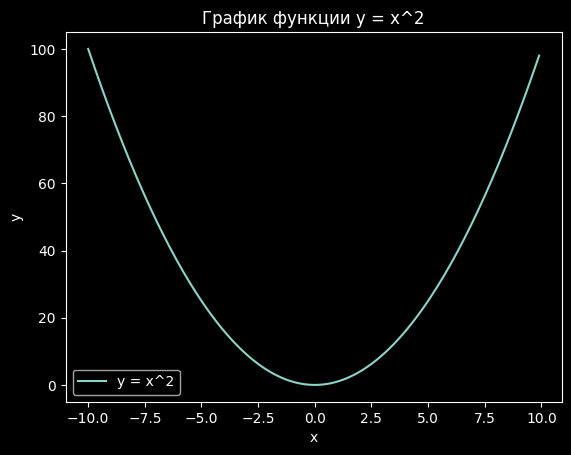

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def plot_square_function():
    # Создаем массив значений x от -10 до 10 с шагом 0.1
    x = np.arange(-10, 10, 0.1)
    # Вычисляем y как квадрат x
    y = x**2

    # Строим график
    plt.plot(x, y, label="y = x^2")

    # Добавляем заголовок и подписи осей
    plt.title("График функции y = x^2")
    plt.xlabel("x")
    plt.ylabel("y")

    # Отображаем легенду
    plt.legend()

    # Показываем график
    plt.show()


# Вызываем функцию для отображения графика
plot_square_function()

In [15]:
?%matplotlib

Docstring:
::

  %matplotlib [-l] [gui]

Set up matplotlib to work interactively.

This function lets you activate matplotlib interactive support
at any point during an IPython session. It does not import anything
into the interactive namespace.

If you are using the inline matplotlib backend in the IPython Notebook
you can set which figure formats are enabled using the following::

    In [1]: from matplotlib_inline.backend_inline import set_matplotlib_formats

    In [2]: set_matplotlib_formats('pdf', 'svg')

The default for inline figures sets `bbox_inches` to 'tight'. This can
cause discrepancies between the displayed image and the identical
image created using `savefig`. This behavior can be disabled using the
`%config` magic::

    In [3]: %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In addition, see the docstrings of
`matplotlib_inline.backend_inline.set_matplotlib_formats` and
`matplotlib_inline.backend_inline.set_matplotlib_close` for more information on
c

In [17]:
%matplotlib notebook
plot_square_function()

<IPython.core.display.Javascript object>

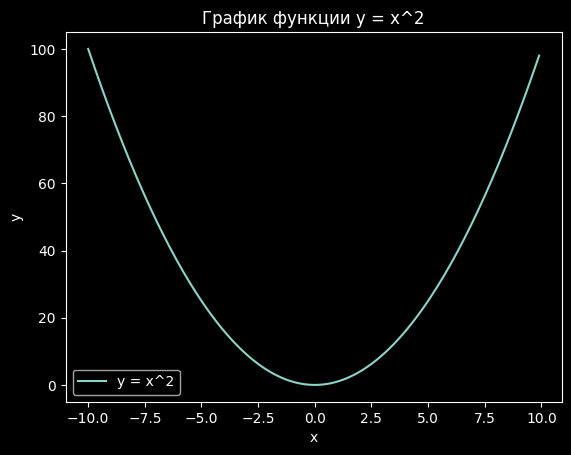

In [18]:
%matplotlib inline
plot_square_function()

Первая команда, как оказывается, вообще работает не всегда. Вторая же выводит картинку в довольно скудном качестве. Поэтому переделаем её в svg формат и выведем еще раз.

In [19]:
%config InlineBackend.figure_format = 'svg'

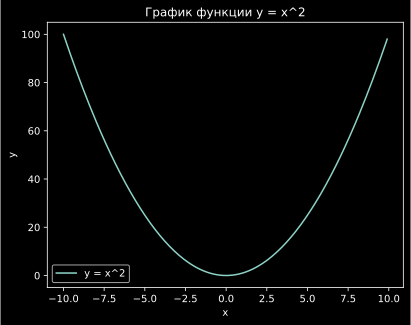

In [21]:
%matplotlib inline
plot_square_function()

#### 4. `%time, %timeit, %%time`

Эти команды необходимы, если нужно замерить время, которое выполняется код.

In [22]:
?%time

Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

In [23]:
%time

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 195 µs


In [27]:
import time
%time time.sleep(1)

CPU times: user 162 µs, sys: 693 µs, total: 855 µs
Wall time: 1.01 s


`%timeit` с ключем `-n` запускает команду несколько раз. Вычисляет среднее и отклонение. Стандартное значение – `7`.

In [29]:
%timeit time.sleep(1)

1 s ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit -n 70 time.sleep(0.01)

12 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 70 loops each)


`%%time` можно написать в начале ячейки и он посчитает для нее время

In [38]:
%%time time.sleep(1)

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [37]:
%%time

for n in range(10):
    time.sleep(0.1)

CPU times: user 316 µs, sys: 969 µs, total: 1.29 ms
Wall time: 1.03 s


#### 5. `%system`, `%%bash`.

Следующие 2 ячейки эквивалентны:

In [39]:
%system ls

['decorators.ipynb', 'jupyter_notebook.ipynb']

In [40]:
!ls

decorators.ipynb       jupyter_notebook.ipynb


А с помощью `%%bash` можно делать многострочные скрипты:

In [43]:
%%bash

echo "Hello"
echo ","
echo "World!"

Hello
,


World!
